In [1]:
from ode import ODE
from riemann import Riemann
import numpy as np
import matplotlib.pyplot as plt

## Exercise 3.4 - Part I

(0.5, 1.2)

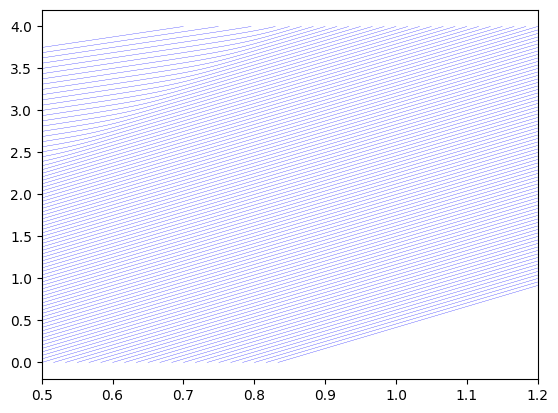

In [2]:
# choose different parameters
# nur ein Rho_L und rho_R und N = 15 waehlen
rho_L = .2
rho_R = .6
N = 100
T = 4

# initialize values
v = lambda rho: 1-rho
L = 1/N

# create starting vector x0
x0 = np.zeros(N)
for i in range(int(N/2) - 1):
    x0[i] = -1/(2*rho_L) + (i)/(N*rho_L)
for i in range(int(N/2)-1, N):
    x0[i] = (i+1)/(N*rho_R) - 1/(2*rho_R)

# solve ode and plot it
ode = ODE(v_func=v, L=L, rho_R=rho_R)
solution = ode.ode_solver(x0, [0,T])
for y in solution.y:
    plt.plot(y, solution.t, color='blue', linewidth=.2)

plt.xlim(0.5,1.2)

## Exercise 3.4 Part II

In [3]:
# choose rho L and R
rho_L = .7
rho_R = .4

riemann = Riemann(rho_L=rho_L, rho_R=rho_R)
x_span = np.arange(start=-1, stop=1.0001, step=.1)

# calculate rho(x,t) for t=0 and t=1
rhos_0 = riemann.pde_solution(x_span, 0)
rhos_1 = riemann.pde_solution(x_span, 1)

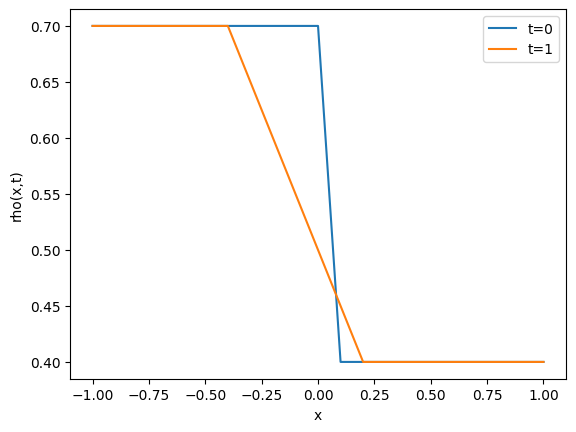

In [4]:
# plot
plt.plot(x_span, rhos_0, label='t=0')
plt.plot(x_span, rhos_1, label='t=1')
plt.xlabel("x")
plt.ylabel("rho(x,t)")
plt.legend()

## Exercise 3.4 - Part III

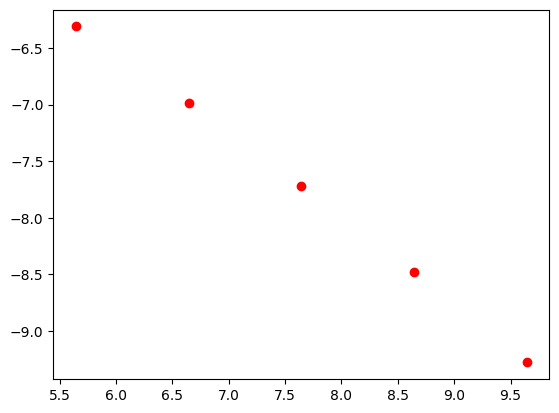

In [9]:
# initialize values
Ns = np.array([50, 100, 200, 400, 800])
errors = list(np.zeros_like(Ns))
rho_L = .9
rho_R = .1
T = 2

v = lambda rho: 1-rho

for i_N in range(len(Ns)):
    N = Ns[i_N]
    L = 1/N
    # Mikro
    x0 = np.zeros(N)
    for i in range(int(N/2) - 1):
        x0[i] = -1/(2*rho_L) + i/(N*rho_L)
    for i in range(int(N/2)-1, N):
        x0[i] = (i+1)/(N*rho_R) - 1/(2*rho_R)

    ode = ODE(v_func=v, L=L, rho_R=rho_R)
    solution = ode.ode_solver(x0, [0,T])

    # get x_i(T)
    xs = solution.y[:,-1].T
    # calculate rho_i_N
    rho_i = L/(xs[1:]-xs[:-1])
 
    # Makro
    riemann = Riemann(rho_L=rho_L, rho_R=rho_R)
    rhos = riemann.pde_solution(xs, T)[:-1]

    # error calculation
    err = np.abs(rho_i - rhos)*(xs[1:]-xs[:-1])
    errors[i_N] = np.sum(err)
    # print(errors)
    # print(np.log2(errors))

plt.plot(np.log2(Ns), np.log2(errors), 'ro')

In [6]:
# unsere Funktion scheint hier einen Fehler zu haben, weil wir eine Gerade erwarten würden. Wir finden den Fehler leider bis jetzt nicht, vielleicht können wir das diskutieren.